## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

#BSD-3 License

### import necessary packages

In [34]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline

In [35]:
### decide whether or not to save figures and data for MATLAB

saveFig = False
saveMat = False

In [36]:
### import the .mat data files


mat1 = loadmat('822e26_compareResponse_block_1_changePts_noDelay',squeeze_me=1)
mat2 = loadmat('822e26_compareResponse_block_2_changePts_noDelay',squeeze_me=1)

In [37]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']


In [38]:
### prepare for pandas data frame


a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}


In [39]:
### make pandas dataframes


dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
#dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ndata2.items() ]))

In [46]:
### assign columns for dataframes


dataFdict1.columns = ['Haptic','Null','2 @ 5.4 mA','1.8 mA - Match Intensity','1.47 mA - Threshold','1.61 mA','2 @ 5.4, 38 @ 1.47 mA','2 @ 5.4 mA, 38 @ 1.8 mA']
dataFdict2.columns = ['Haptic','Null','2 @ 3.75 mA','2.0 mA - Match Intensity','1.6 mA - Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']


dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = 'a1355e'
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
dataMelt1.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)


In [47]:
dataMelt1.groupby(['Experiment']).describe().round()


Response Time (ms)                                 \
                                      count    mean    std     min     25%   
Experiment                                                                   
1.47 mA - Threshold                     1.0  2092.0    NaN  2092.0  2092.0   
1.61 mA                                 0.0     NaN    NaN     NaN     NaN   
1.8 mA - Match Intensity                1.0   306.0    NaN   306.0   306.0   
2 @ 5.4 mA                             20.0   273.0   79.0   210.0   223.0   
2 @ 5.4 mA, 38 @ 1.8 mA                20.0   338.0   80.0   219.0   292.0   
2 @ 5.4, 38 @ 1.47 mA                  20.0   327.0   55.0   257.0   293.0   
Haptic                                 16.0   267.0  164.0   161.0   190.0   
Null                                    0.0     NaN    NaN     NaN     NaN   

                                                  
                             50%     75%     max  
Experiment                                        
1.47 mA - Threshold       2092.0  2092.0  2092.0  
1.61 mA                      NaN     NaN     NaN  
1.8 mA - Match Intensity   306.0   306.0   306.0  
2 @ 5.4 mA                 244.0   287.0   532.0  
2 @ 5.4 mA, 38 @ 1.8 mA    318.0   366.0   505.0  
2 @ 5.4, 38 @ 1.47 mA      313.0   343.0   485.0  
Haptic                     209.0   247.0   705.0  
Null                         NaN     NaN     NaN

In [48]:
### concatenate

frames = [dataMelt1,dataMelt2]

result = pd.concat(frames)
result
resultTrim = result[(result['Response Time (ms)'] < respHi) & (result['Response Time (ms)'] > respLo)]
resultTrim.groupby(['Experiment','Subject','block']).median()

,,,Response Time (ms)
Experiment,Subject,block,
1.6 mA - Threshold,1,2,179.48672
1.79 mA,1,2,435.81440
1.8 mA - Match Intensity,1,1,306.09408
2 @ 3.75 mA,1,2,522.89536
2 @ 5.4 mA,1,1,244.26496
"2 @ 5.4 mA, 38 @ 1.8 mA",1,1,317.84960
"2 @ 5.4, 38 @ 1.47 mA",1,1,312.79104
"2 @ 6 mA, 38 @ 1.6 mA",1,2,396.75904
"2 @ 6. mA, 38 @ 2 mA",1,2,373.84192


In [49]:
experimentsOfInt =  ['Haptic','2 @ 5.4 mA','1.8 mA - Match Intensity','1.47 mA - Threshold','1.61 mA','2 @ 5.4, 38 @ 1.47 mA','2 @ 5.4 mA, 38 @ 1.8 mA',
                    '2 @ 3.75 mA','2.0 mA - Match Intensity','1.6 mA - Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']

In [50]:
### look at various metrics of interest


dataCleaned = resultTrim[resultTrim['Experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['Experiment','Subject','block']).mean()
dataCleaned.groupby(['block','Experiment','Subject']).describe()
#dataCleaned.groupby(['Subject','experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

Response Time (ms)              \
                                                    count        mean   
block Experiment               Subject                                  
1     1.8 mA - Match Intensity 1                      1.0  306.094080   
      2 @ 5.4 mA               1                     20.0  273.285120   
      2 @ 5.4 mA, 38 @ 1.8 mA  1                     20.0  337.764352   
      2 @ 5.4, 38 @ 1.47 mA    1                     20.0  326.950912   
      Haptic                   1                     16.0  267.169280   
2     1.6 mA - Threshold       1                      1.0  179.486720   
      1.79 mA                  1                      5.0  503.971840   
      2 @ 3.75 mA              1                      9.0  543.953351   
      2 @ 6 mA, 38 @ 1.6 mA    1                     20.0  391.079936   
      2 @ 6. mA, 38 @ 2 mA     1                     20.0  392.828928   
      2.0 mA - Match Intensity 1                     18.0  493.456498   
      Haptic                   1                     18.0  236.926293   

                                                                          \
                                               std        min        25%   
block Experiment               Subject                                     
1     1.8 mA - Match Intensity 1               NaN  306.09408  306.09408   
      2 @ 5.4 mA               1         79.101060  210.04288  223.29344   
      2 @ 5.4 mA, 38 @ 1.8 mA  1         80.161654  219.17696  292.03456   
      2 @ 5.4, 38 @ 1.47 mA    1         55.010388  257.47456  293.36576   
      Haptic                   1        164.446931  160.93184  190.34112   
2     1.6 mA - Threshold       1               NaN  179.48672  179.48672   
      1.79 mA                  1        185.446480  355.04128  404.93056   
      2 @ 3.75 mA              1        189.150777  240.72192  400.22016   
      2 @ 6 mA, 38 @ 1.6 mA    1        116.346834  175.34976  288.86016   
      2 @ 6. mA, 38 @ 2 mA     1        111.549349  202.99776  320.36864   
      2.0 mA - Match Intensity 1        225.805996  299.86816  319.31392   
      Haptic                   1         89.459558  169.00096  197.62176   

                                                                         
                                              50%        75%        max  
block Experiment               Subject                                   
1     1.8 mA - Match Intensity 1        306.09408  306.09408  306.09408  
      2 @ 5.4 mA               1        244.26496  287.48800  532.31616  
      2 @ 5.4 mA, 38 @ 1.8 mA  1        317.84960  366.33600  505.32352  
      2 @ 5.4, 38 @ 1.47 mA    1        312.79104  343.04000  485.41696  
      Haptic                   1        208.97792  246.65088  705.41312  
2     1.6 mA - Threshold       1        179.48672  179.48672  179.48672  
      1.79 mA                  1        435.81440  502.41536  821.65760  
      2 @ 3.75 mA              1        522.89536  663.38816  832.14336  
      2 @ 6 mA, 38 @ 1.6 mA    1        396.75904  454.78912  632.54528  
      2 @ 6. mA, 38 @ 2 mA     1        373.84192  485.89824  560.45568  
      2.0 mA - Match Intensity 1        364.09344  565.20704  938.68032  
      Haptic                   1        215.08096  240.19968  575.61088

In [51]:
typeOrderSort= ['Haptic','2 @ 5.4 mA','1.8 mA - Match Intensity','1.47 mA - Threshold','1.61 mA','2 @ 5.4, 38 @ 1.47 mA','2 @ 5.4 mA, 38 @ 1.8 mA','2 @ 3.75 mA','2.0 mA - Match Intensity','1.6 mA - Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))

dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.Experiment.isin(typeOrderSort),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.Experiment.isin(typeOrderSort),other='0') 

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))


#dataCleaned[dataCleaned['experiment'] == '2 @ 3000 uA, 38 @ 1250 uA']

C:\Users\david\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 576x288 with 0 Axes>

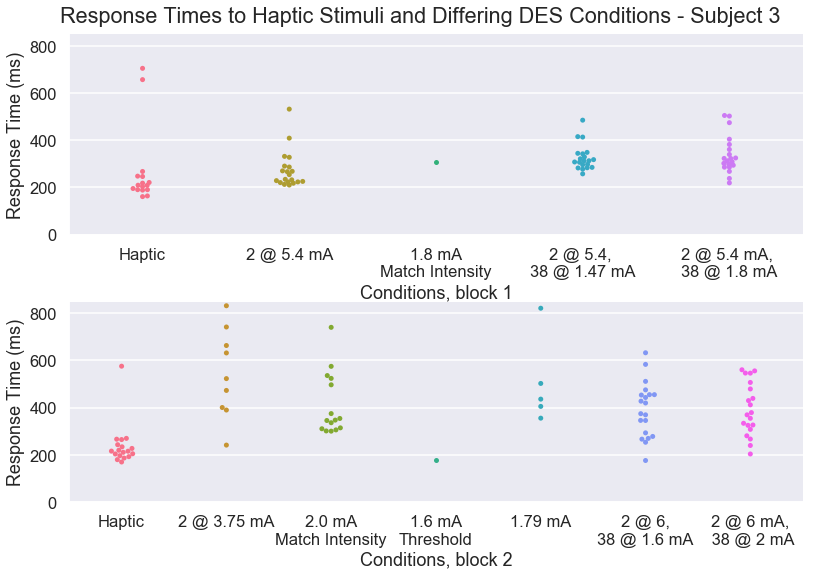

In [54]:
### use the "data cleaned" variable from above to make the individual subject plot

plt.figure(figsize=(8,4))
plt.tight_layout()
sns.set_context("talk")

frameIndividual = sns.FacetGrid(data=dataCleaned,row='block',height=4, aspect=3,sharex=False,sharey=True)
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,'Experiment',"Response Time (ms)",palette='husl')
frameIndividual.axes[0,0].set_xlabel('Conditions, block 1')
frameIndividual.axes[1,0].set_xlabel('Conditions, block 2')
frameIndividual.axes[0,0].set_title('')
frameIndividual.axes[1,0].set_title('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,850])

#frameIndividual.axes[0,0].set_title('Different stimulation train response times ')

#plt.subplots_adjust(top=1)
title = frameIndividual.fig.suptitle('Response Times to Haptic Stimuli and Differing DES Conditions - Subject 3') # can also get the figure from plt.gcf()
#title.set_fontsize(25)

xlab1 = ['Haptic','2 @ 5.4 mA','1.8 mA','2 @ 5.4, ','2 @ 5.4 mA, ']
xlab2 = ['','','Match Intensity','38 @ 1.47 mA','38 @ 1.8 mA']
xlabels = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab1,xlab2)]

dataFdict2.columns = ['Haptic','Null','Primed Only (3.75 mA)','2.0 mA - Match Intensity','1.6 mA - Threshold','1.79 mA','2 @ 6 mA, 38 @ 1.6 mA','2 @ 6. mA, 38 @ 2 mA']


frameIndividual.axes[0,0].set_xticklabels(xlabels)
xlab12 = ['Haptic','2 @ 3.75 mA','2.0 mA','1.6 mA','1.79 mA','2 @ 6,','2 @ 6 mA,']
xlab22 = ['','','Match Intensity','Threshold','','38 @ 1.6 mA',' 38 @ 2 mA']
xlabels2 = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab12,xlab22)]
frameIndividual.axes[1,0].set_xticklabels(xlabels2)

saveFig = 1
if saveFig:
    figIndividual.savefig('822e26_priming_RT_CP_paper.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('822e26_priming_RT_CP_paper.png', dpi=600,bbox_inches='tight')
    figIndividual.savefig('822e26_priming_RT_CP_paper.eps', dpi=600,bbox_inches='tight')

In [18]:
dataCleaned

,experiment,response time (ms),Subject,block,typeOrder
6,haptic,197.14048,1,1,False
7,haptic,245.47328,1,1,False
8,haptic,153.06752,1,1,False
9,haptic,152.94464,1,1,False
11,haptic,239.00160,1,1,False
12,haptic,268.16512,1,1,False
13,haptic,175.75936,1,1,False
14,haptic,170.51648,1,1,False
15,haptic,192.67584,1,1,False
17,haptic,169.04192,1,1,False


In [19]:
from scipy.stats.mstats import kruskalwallis

priming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.experiment == 'priming')]['response time (ms)'].dropna()
noPriming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.experiment == 'no priming')]['response time (ms)'].dropna()
scipy.stats.kruskal(priming,noPriming)


KruskalResult(statistic=nan, pvalue=nan)

ValueError: In safezip, len(args[0])=2 but len(args[1])=1

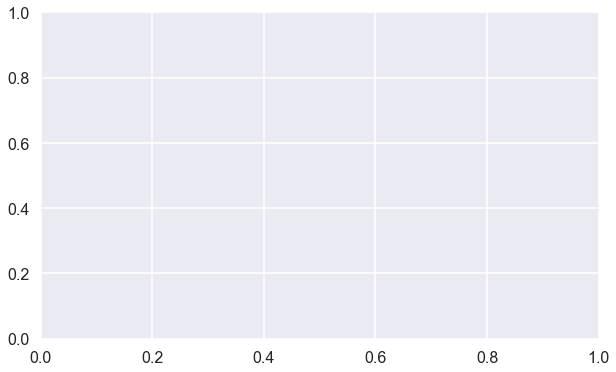

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

dataStats = dataCleaned[dataCleaned.Subject=='1']['response time (ms)']
groupsStats = dataCleaned[dataCleaned.Subject=='1']['experiment']

tukey = pairwise_tukeyhsd(endog=dataStats,     # Data
                          groups=groupsStats,   # Groups
                          alpha=0.05)          # Significance level


tukey.summary()
tukey.plot_simultaneous()    # Plot group confidence intervals


In [ ]:
figBlock = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=1,
...                   col="Subject", data=dataCleaned,kind="swarm",dodge="True",col_order=['2','3','4'],
...                   order=['no priming','priming']a,
...                   palette=color_pal_2_v2)
plt.ylim([0,1100])

figBlock.axes[0,0].set_title('Subject 2')
figBlock.axes[0,1].set_title('Subject 3')
figBlock.axes[0,2].set_title('Subject 4')

figBlock.axes[0,0].set_xlabel('')
figBlock.axes[0,1].set_xlabel('')
figBlock.axes[0,2].set_xlabel('')

if saveFig:
    figBlock.savefig('swarmByBlockSplit_subj4.svg', dpi=600)
    figBlock.savefig('swarmByBlockSplit_subj4.png', dpi=300)

resultTrim_forBox = resultTrim[~(resultTrim['Subject'].isin(['3','4']) & (resultTrim['experiment'].isin(['100 ms '])))]
result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]


frameGroup = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim_forBox,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '],palette=color_pal_3)
handles, labels = frameGroup.get_legend_handles_labels()
frameGroup  = sns.swarmplot(x = 'experiment',y='response time (ms)',size=4,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frameGroup.legend_.remove()
frameGroup.legend(handles, labels, loc="upper left", title="Subject")


figGroupBox = plt.gcf()
figGroupBox.set_size_inches(12,10)
plt.ylim([0,1100])
if saveFig:
    figGroupBox.savefig('swarmAndBoxSID_subj4.svg', dpi=600)
    figGroupBox.savefig('swarmAndBoxSID_subj4.png', dpi=300)

### To prepare the data to save for MATLAB


#dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

equiv = {'touch':'a','100 ms ':'b','200 ms ':'c','400 ms ':'d', '800 ms ':'e'}

dataCleaned['sortCol'] = dataCleaned['experiment'].map(equiv)
#dataCleaned['experiment'] = pd.Categorical(dataCleaned['experiment'], ["tactor","100 ms ","200 ms ","400 ms ", "800 ms "])
dataCleaned=dataCleaned.assign(sortCol=dataCleaned.sortCol.apply(str)).sort_values(["Subject","sortCol"],ascending=[True,True])

typeOrderSort= ['100 ms ','200 ms ','400 ms ', '800 ms ']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrderSort))
dataCleaned[dataCleaned['experiment']=='touch']


if saveMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_4subj.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_4subj.csv')


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrderSort),other='0')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrderSort),other='1') 

dataCleaned



### use the "data cleaned" variable from above to make the individual subject plot

frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"experiment","response time (ms)",'typeOrder',palette='husl')
frameIndividual.axes[0,0].set_xlabel('')
frameIndividual.axes[0,1].set_xlabel('')
frameIndividual.axes[0,2].set_xlabel('')
frameIndividual.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,1100])

frameIndividual.axes[0,0].set_title('Subject 1')
frameIndividual.axes[0,1].set_title('Subject 2')
frameIndividual.axes[0,2].set_title('Subject 3')
frameIndividual.axes[0,3].set_title('Subject 4')


if saveFig:
    figIndividual.savefig('swarmBySid_col_4subj.svg', dpi=600)
    figIndividual.savefig('swarmBySid_col_4subj.png', dpi=600)


### test for normality using Anderson-Darling test


groupedData = dataCleaned.groupby(['Subject','experiment'])

groupedData.apply(lambda x: scipy.stats.anderson((x['response time (ms)']),dist='norm'))

import statsmodels.api as sm
groupedData.apply(lambda x: sm.stats.diagnostic.normal_ad((x['response time (ms)'])))